# Energy Analysis Sensitivity of Lifetime, Efficiency, and Material Circularity
This journal complements the 17-Energy Results journal to understand the sensitivity of our metrics to three module design aspects; lifetime, efficiency, and material circularity. This journal creates a simple modern module; 25 years, 20% efficiency, no material circularity, and modifies first one parameter, and then two parameters at a time. This will allow us to elucidate if there are multiplicative effects of changing design aspects.

Circularity will only consider the glass, silicon, silver, and aluminium_frames, as these are the currently captured and recycled materials explored in the main energy analysis, and have recycling routes in current industry practice

In [1]:
import numpy as np
import pandas as pd
import os,sys
from pathlib import Path
import matplotlib.pyplot as plt

cwd = os.getcwd() #grabs current working directory

testfolder = str(Path().resolve().parent.parent / 'PV_ICE' / 'TEMP' / 'EnergyAnalysis'/'Sensitivity')
inputfolder = str(Path().resolve().parent.parent / 'PV_ICE' / 'TEMP')
baselinesfolder = str(Path().resolve().parent.parent /'PV_ICE' / 'baselines')
supportMatfolder = str(Path().resolve().parent.parent / 'PV_ICE' / 'baselines' / 'SupportingMaterial')
altBaselinesfolder = str(Path().resolve().parent.parent / 'PV_ICE' / 'baselines' / 'Energy_CellModuleTechCompare')

if not os.path.exists(testfolder):
    os.makedirs(testfolder)

In [2]:
from platform import python_version 
print(python_version())

3.8.8


In [3]:
import PV_ICE
PV_ICE.__version__

'v0.2.0+502.g70a70d1.dirty'

In [4]:
MATERIALS = ['glass', 'silicon', 'silver', 'aluminium_frames', 'copper', 'encapsulant', 'backsheet']
MATERIALS_recycle = ['glass','silicon','silver','aluminium_frames']
MATERIALS_NOrecycle = ['copper','encapsulant','backsheet']

moduleFile_m = os.path.join(baselinesfolder, 'baseline_modules_mass_US.csv')
moduleFile_e = os.path.join(baselinesfolder, 'baseline_modules_energy.csv')

In [5]:
#load in a baseline and materials for modification
sim1 = PV_ICE.Simulation(name='sim1', path=testfolder)

sim1.createScenario(name='PV_ICE', massmodulefile=moduleFile_m, energymodulefile=moduleFile_e)
for mat in range (0, len(MATERIALS)):
    matbaseline_m = os.path.join(baselinesfolder,'baseline_material_mass_'+MATERIALS[mat]+'.csv')
    matbaseline_e = os.path.join(baselinesfolder,'baseline_material_energy_'+MATERIALS[mat]+'.csv')
    sim1.scenario['PV_ICE'].addMaterial(MATERIALS[mat], massmatfile=matbaseline_m, energymatfile=matbaseline_e)

path = C:\Users\hmirletz\Documents\GitHub\PV_ICE\PV_ICE\TEMP\EnergyAnalysis\Sensitivity
Baseline folder directed to default:  C:\Users\hmirletz\Documents\GitHub\PV_ICE\PV_ICE\baselines


## Create Sensitivity Scenarios
First, examine only the effect of one set of parameters (life, eff, material circularity) at a time. Possibly get to interactions.

In [6]:
timeshift = 2022-1995

### Life

In [7]:
#life sensitivity
#mod_reliability_t50, mod_reliability_t90, mod_degradation, mod_lifetime

sim1.createScenario(name='life_high', massmodulefile=moduleFile_m, energymodulefile=moduleFile_e)
for mat in range (0, len(MATERIALS)):
    matbaseline_m = os.path.join(baselinesfolder,'baseline_material_mass_'+MATERIALS[mat]+'.csv')
    matbaseline_e = os.path.join(baselinesfolder,'baseline_material_energy_'+MATERIALS[mat]+'.csv')
    sim1.scenario['life_high'].addMaterial(MATERIALS[mat], massmatfile=matbaseline_m, energymatfile=matbaseline_e)
    
#Lifetime and Degradation
#degradation rate:
sim1.modifyScenario('life_high', 'mod_degradation', 
                    sim1.scenario['PV_ICE'].dataIn_m.loc[timeshift:,'mod_degradation']-0.1, start_year=2022) #standard current degrdation
#T50
sim1.modifyScenario('life_high', 'mod_reliability_t50',
                    sim1.scenario['PV_ICE'].dataIn_m.loc[timeshift:,'mod_reliability_t50']+10, start_year=2022)
#t90
sim1.modifyScenario('life_high', 'mod_reliability_t90',
                    sim1.scenario['PV_ICE'].dataIn_m.loc[timeshift:,'mod_reliability_t90']+10, start_year=2022) 
#Mod Project Lifetime
sim1.modifyScenario('life_high', 'mod_lifetime',
                    sim1.scenario['PV_ICE'].dataIn_m.loc[timeshift:,'mod_lifetime']+10, start_year=2022) #project lifetime of 25 years

#--------------------------------------------------------------------------------------

#life low
sim1.createScenario(name='life_low', massmodulefile=moduleFile_m, energymodulefile=moduleFile_e)
for mat in range (0, len(MATERIALS)):
    matbaseline_m = os.path.join(baselinesfolder,'baseline_material_mass_'+MATERIALS[mat]+'.csv')
    matbaseline_e = os.path.join(baselinesfolder,'baseline_material_energy_'+MATERIALS[mat]+'.csv')
    sim1.scenario['life_low'].addMaterial(MATERIALS[mat], massmatfile=matbaseline_m, energymatfile=matbaseline_e)
    
#Lifetime and Degradation
#degradation rate:
sim1.modifyScenario('life_low', 'mod_degradation', 
                    sim1.scenario['PV_ICE'].dataIn_m.loc[timeshift:,'mod_degradation']+0.1, start_year=2022) #standard current degrdation
#T50
sim1.modifyScenario('life_low', 'mod_reliability_t50',
                    sim1.scenario['PV_ICE'].dataIn_m.loc[timeshift:,'mod_reliability_t50']-10, start_year=2022)
#t90
sim1.modifyScenario('life_low', 'mod_reliability_t90',
                    sim1.scenario['PV_ICE'].dataIn_m.loc[timeshift:,'mod_reliability_t90']-10, start_year=2022) 
#Mod Project Lifetime
sim1.modifyScenario('life_low', 'mod_lifetime',
                    sim1.scenario['PV_ICE'].dataIn_m.loc[timeshift:,'mod_lifetime']-10, start_year=2022) #project lifetime of 25 years



### Efficiency

In [8]:
sim1.createScenario(name='eff_high', massmodulefile=moduleFile_m, energymodulefile=moduleFile_e)
for mat in range (0, len(MATERIALS)):
    matbaseline_m = os.path.join(baselinesfolder,'baseline_material_mass_'+MATERIALS[mat]+'.csv')
    matbaseline_e = os.path.join(baselinesfolder,'baseline_material_energy_'+MATERIALS[mat]+'.csv')
    sim1.scenario['eff_high'].addMaterial(MATERIALS[mat], massmatfile=matbaseline_m, energymatfile=matbaseline_e)
    
sim1.modifyScenario('eff_high', 'mod_eff', 
                    sim1.scenario['PV_ICE'].dataIn_m.loc[timeshift:,'mod_eff']+5, start_year=2022) #

#-------------------------------------------------------------------------------------------------------

sim1.createScenario(name='eff_high_bifi', massmodulefile=moduleFile_m, energymodulefile=moduleFile_e)
for mat in range (0, len(MATERIALS)):
    matbaseline_m = os.path.join(baselinesfolder,'baseline_material_mass_'+MATERIALS[mat]+'.csv')
    matbaseline_e = os.path.join(baselinesfolder,'baseline_material_energy_'+MATERIALS[mat]+'.csv')
    sim1.scenario['eff_high_bifi'].addMaterial(MATERIALS[mat], massmatfile=matbaseline_m, energymatfile=matbaseline_e)
    
sim1.modifyScenario('eff_high_bifi', 'mod_eff', 
                    sim1.scenario['PV_ICE'].dataIn_m.loc[timeshift:,'mod_eff']+5, start_year=2022) #

#------------------------------------------------------------------------------------------------------

sim1.createScenario(name='eff_low', massmodulefile=moduleFile_m, energymodulefile=moduleFile_e)
for mat in range (0, len(MATERIALS)):
    matbaseline_m = os.path.join(baselinesfolder,'baseline_material_mass_'+MATERIALS[mat]+'.csv')
    matbaseline_e = os.path.join(baselinesfolder,'baseline_material_energy_'+MATERIALS[mat]+'.csv')
    sim1.scenario['eff_low'].addMaterial(MATERIALS[mat], massmatfile=matbaseline_m, energymatfile=matbaseline_e)
    
sim1.modifyScenario('eff_low', 'mod_eff', 
                    sim1.scenario['PV_ICE'].dataIn_m.loc[timeshift:,'mod_eff']-5, start_year=2022) #

### Material Circularity
Here, we will use recycling as a stand in for the forms of material circularity. We set to 0%, 25%, and 100% closed loop (through mat_PG4_Recycling_target). This will give us the maximum and minimum, as well as a middle value that is a change more comparable to varying lifetime and efficiency (also changed by 20-30%). Using the recycling target variable means that it will not spend energy on recycling unless it is a target.

In [9]:
mod_circ_vars = ['mod_EOL_pg4_recycled', 'mod_EOL_pb4_recycled']

mod_alt_paths = ['mod_EOL_pg0_resell','mod_EOL_pg2_stored','mod_EOL_pg3_reMFG',
                 'mod_EOL_reMFG_yield','mod_EOL_sp_reMFG_recycle',
                 'mod_EOL_pb2_stored','mod_EOL_pb3_reMFG'] #removed landfills

mat_circ_vars = ['mat_MFG_scrap_Recycled', 'mat_MFG_scrap_Recycling_eff', 'mat_MFG_scrap_Recycled_into_HQ',
                 'mat_MFG_scrap_Recycled_into_HQ_Reused4MFG', 
                 'mat_PG4_Recycling_target', 'mat_Recycling_yield',
                 'mat_EOL_Recycled_into_HQ', 'mat_EOL_RecycledHQ_Reused4MFG']

#mat_mfgscrap = ['mat_MFG_scrap_Recycled', 'mat_MFG_scrap_Recycling_eff', 'mat_MFG_scrap_Recycled_into_HQ',
#                 'mat_MFG_scrap_Recycled_into_HQ_Reused4MFG']

#path control variables are:
# 'mat_PG4_Recycling_target'
# 'mat_MFG_scrap_Recycled'
# 'mod_EOL_pg4_recycled'
# 'mod_EOL_pb4_recycled'

In [10]:
sim1.createScenario(name='circ_high', massmodulefile=moduleFile_m, energymodulefile=moduleFile_e)
for mat in range (0, len(MATERIALS)):
    matbaseline_m = os.path.join(baselinesfolder,'baseline_material_mass_'+MATERIALS[mat]+'.csv')
    matbaseline_e = os.path.join(baselinesfolder,'baseline_material_energy_'+MATERIALS[mat]+'.csv')
    sim1.scenario['circ_high'].addMaterial(MATERIALS[mat], massmatfile=matbaseline_m, energymatfile=matbaseline_e)
    
for var in range(0,len(mod_alt_paths)):
    sim1.modifyScenario('circ_high', mod_alt_paths[var], 0.0, start_year=2022) #set non recycle to 0   

sim1.modifyScenario('circ_high', 'mod_EOL_collection_eff',100.0, start_year=2022) #collect everything
sim1.modifyScenario('circ_high','mod_EOL_pb1_landfill',100.0,start_year=2022) #landfill up just in case
sim1.modifyScenario('circ_high','mod_EOL_pg1_landfill',100.0,start_year=2022)
    
for var in range(0,len(mod_circ_vars)):
    sim1.modifyScenario('circ_high', mod_circ_vars[var], 100.0, start_year=2022) #set recycle paths to 100%

for mat in range (0, len(MATERIALS_recycle)): #modify only targeted materials
    for mvar in range(0,len(mat_circ_vars)):
        sim1.scenario['circ_high'].modifyMaterials(MATERIALS_recycle[mat], mat_circ_vars[mvar],100.0, start_year=2022) #
        sim1.scenario['circ_high'].modifyMaterials(MATERIALS_recycle[mat], 'mat_MFG_scrap_Recycled',100.0, start_year=2022) #

#--------------------------------------------------------------------------------------------------------
        
sim1.createScenario(name='circ_mid', massmodulefile=moduleFile_m, energymodulefile=moduleFile_e)
for mat in range (0, len(MATERIALS)):
    matbaseline_m = os.path.join(baselinesfolder,'baseline_material_mass_'+MATERIALS[mat]+'.csv')
    matbaseline_e = os.path.join(baselinesfolder,'baseline_material_energy_'+MATERIALS[mat]+'.csv')
    sim1.scenario['circ_mid'].addMaterial(MATERIALS[mat], massmatfile=matbaseline_m, energymatfile=matbaseline_e)
    
for var in range(0,len(mod_alt_paths)):
    sim1.modifyScenario('circ_mid', mod_alt_paths[var], 0.0, start_year=2022) #set non recycle to 0   

sim1.modifyScenario('circ_mid', 'mod_EOL_collection_eff',100.0, start_year=2022) #collect everything
sim1.modifyScenario('circ_mid','mod_EOL_pb1_landfill',100.0,start_year=2022) #landfill up just in case
sim1.modifyScenario('circ_mid','mod_EOL_pg1_landfill',100.0,start_year=2022)
    
for var in range(0,len(mod_circ_vars)):
    sim1.modifyScenario('circ_mid', mod_circ_vars[var], 25.0, start_year=2022) #set recycle paths to 25%

for mat in range (0, len(MATERIALS_recycle)): #modify only targeted materials
    for mvar in range(0,len(mat_circ_vars)):
        sim1.scenario['circ_mid'].modifyMaterials(MATERIALS_recycle[mat], mat_circ_vars[mvar],100.0, start_year=2022) #
        sim1.scenario['circ_mid'].modifyMaterials(MATERIALS_recycle[mat], 'mat_MFG_scrap_Recycled',25.0, start_year=2022) #
#-----------------------------------------------------------------------------------------------------------

sim1.createScenario(name='circ_low', massmodulefile=moduleFile_m, energymodulefile=moduleFile_e)
for mat in range (0, len(MATERIALS)):
    matbaseline_m = os.path.join(baselinesfolder,'baseline_material_mass_'+MATERIALS[mat]+'.csv')
    matbaseline_e = os.path.join(baselinesfolder,'baseline_material_energy_'+MATERIALS[mat]+'.csv')
    sim1.scenario['circ_low'].addMaterial(MATERIALS[mat], massmatfile=matbaseline_m, energymatfile=matbaseline_e)
    
#sim1.scenMod_noCircularity(scenarios='circ_low') #sets all years to 0
    
for var in range(0,len(mod_circ_vars)):
    sim1.modifyScenario('circ_low', mod_circ_vars[var],0.0, start_year=2022) #set recycle to 0
    
for var in range(0,len(mod_alt_paths)):
    sim1.modifyScenario('circ_low', mod_alt_paths[var], 0.0, start_year=2022) #set non recycle to 0   

sim1.modifyScenario('circ_low', 'mod_EOL_collection_eff',0.0, start_year=2022) #collect nothing
sim1.modifyScenario('circ_low','mod_EOL_pb1_landfill',100.0,start_year=2022) #landfill up 
sim1.modifyScenario('circ_low','mod_EOL_pg1_landfill',100.0,start_year=2022)

for mat in range (0, len(MATERIALS_recycle)): #modify only targeted materials
    for mvar in range(0,len(mat_circ_vars)):
        sim1.scenario['circ_low'].modifyMaterials(MATERIALS_recycle[mat], mat_circ_vars[mvar],0.0, start_year=2022) #

In [11]:
#trim to start in 2000, this trims module and materials
#had to specify and end year, cannot use to extend
sim1.trim_Years(startYear=2000, endYear=2100)

Trimming and extending  PV_ICE
PV_ICE glass : Data trimmed for Energy, years now encompass  2000  to  2100
PV_ICE silicon : Data trimmed for Energy, years now encompass  2000  to  2100
PV_ICE silver : Data trimmed for Energy, years now encompass  2000  to  2100
PV_ICE aluminium_frames : Data trimmed for Energy, years now encompass  2000  to  2100
PV_ICE copper : Data trimmed for Energy, years now encompass  2000  to  2100
PV_ICE encapsulant : Data trimmed for Energy, years now encompass  2000  to  2100
PV_ICE backsheet : Data trimmed for Energy, years now encompass  2000  to  2100
PV_ICE backsheet : Data trimmed for Mass, years now encompass  2000  to  2100
Trimming and extending  life_high
life_high glass : Data trimmed for Energy, years now encompass  2000  to  2100
life_high silicon : Data trimmed for Energy, years now encompass  2000  to  2100
life_high silver : Data trimmed for Energy, years now encompass  2000  to  2100
life_high aluminium_frames : Data trimmed for Energy, years 

In [12]:
global_projection = pd.read_csv(os.path.join(supportMatfolder,'output-globalInstallsProjection.csv'), index_col=0)
global_projection.iloc[-1,:]

#fig, ax1 = plt.subplots()

#ax1.stackplot(global_projection.index, global_projection['World_cum']/1e6, color='#F7A11A')
#ax1.set_ylabel('Cumulative Solar Capacity [TW]', color='#F7A11A')
#ax1.set_ylim(0,90)
#ax1.set_xlim(2000,2100)
#ax2 = ax1.twinx()
#ax2.plot(global_projection['World_annual_[MWdc]']/1e6)
#ax2.set_ylabel('Annual Installations [TW]')
#ax2.set_ylim(0,5)
#plt.show()

#fig.savefig('energyresults-deployment.png', dpi=300, bbox_inches='tight')

World_cum              85966000.0
World_annual_[MWdc]      219320.0
Name: 2100, dtype: float64

In [13]:
#deployment projection for all scenarios
sim1.modifyScenario(scenarios=None,stage='new_Installed_Capacity_[MW]', 
                    value= global_projection['World_annual_[MWdc]'], start_year=2000)

In [14]:
scennames_labels = sim1.scenario.keys()
scennames_labels

dict_keys(['PV_ICE', 'life_high', 'life_low', 'eff_high', 'eff_high_bifi', 'eff_low', 'circ_high', 'circ_mid', 'circ_low'])

In [15]:
bifiFactors = {'PV_ICE':0.0,
               'life_high':0.0,
               'life_low': 0.0,
               'eff_high': 0.0,
               'eff_high_bifi': 0.9,
               'eff_low': 0.0,
               'circ_high':0.0,
               'circ_mid':0.0,
               'circ_low': 0.0
              } 

#PV ICE currently set up to read in a csv of bifi factors, so generate files to read in 
idx_temp = pd.RangeIndex(start=2000,stop=2101,step=1) #create the index
df_temp = pd.DataFrame(index=idx_temp, columns=['bifi'], dtype=float)
bifiPathDict={}

for f in bifiFactors.keys(): #loop over module types
    bifi = df_temp.copy() #copy of df
    bifi['bifi'] = bifiFactors[f] #assign column
    bifipath = os.path.join(testfolder,'bifi_'+str(f)+'.csv') #create file path
    bifi.to_csv(path_or_buf=bifipath, index_label='year') #create file
    bifiPathDict[str(f)] = bifipath
    #append bifi path to dict? or list?

## Calculate Mass Flow: Identical Installs

In [16]:
#CALCULATE MASS FLOWs
#13 scenarios, 7 mats = 

for scen in sim1.scenario.keys(): #loop over scenarios
    sim1.calculateMassFlow(scenarios=[scen], bifacialityfactors=bifiPathDict[scen])

>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
>>>> Calculating Material Flows <<<<

Working on Scenario:  life_high
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
>>>> Calculating Material Flows <<<<

Working on Scenario:  life_low
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Mate

In [17]:
#sim1.calculateMassFlow()

In [18]:
ii_yearly, ii_cumu = sim1.aggregateResults() #have to do this to get auto plots
sim1.saveSimulation(customname='_EnergySensitivity_identicalinstalls')

:) Saved Input and Output Dataframes


(0.0, 90.26425956655)

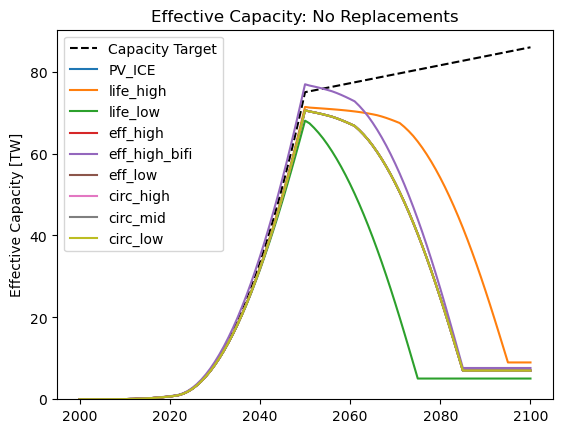

In [19]:
effective_capacity = ii_yearly.filter(like='ActiveCapacity')
plt.plot(ii_cumu['newInstalledCapacity_sim1_PV_ICE_[MW]']/1e6, label='Capacity Target', color='black', ls='--')
plt.plot(effective_capacity/1e6, label=sim1.scenario.keys())
plt.legend()
plt.ylabel('Effective Capacity [TW]')
plt.title('Effective Capacity: No Replacements')
plt.ylim(0,)

Text(0.5, 1.0, 'Cumulative Installs with Replacements')

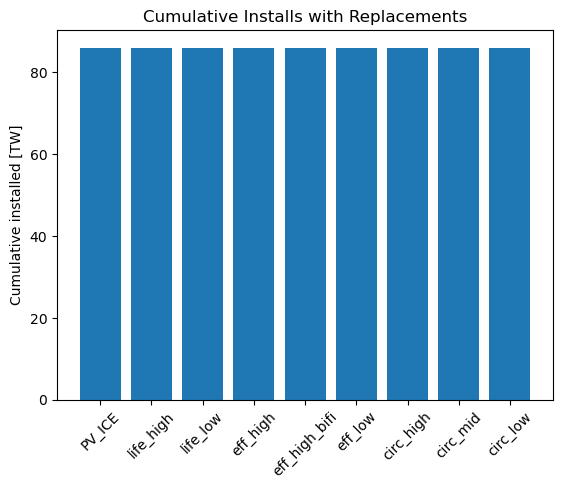

In [20]:
cumu_installs = ii_cumu.filter(like='newInstalled')
total_installed = cumu_installs.loc[2100]
total_installed.index= scennames_labels

plt.bar(scennames_labels, total_installed/1e6)
plt.xticks(rotation=45)
plt.ylabel('Cumulative installed [TW]')
plt.title('Cumulative Installs with Replacements')
#plt.ylim(0,410)

Text(0, 0.5, 'Virgin Material Requirements\n[billion tonnes]')

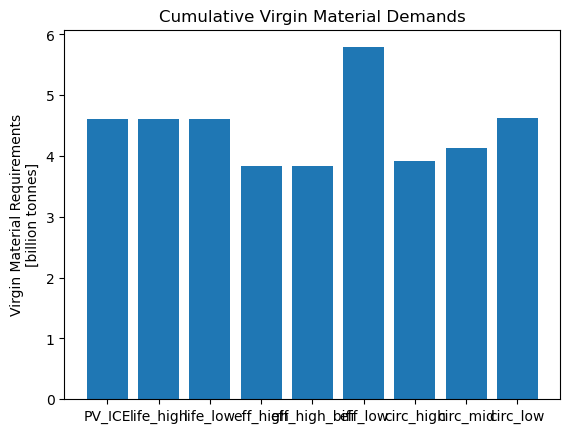

In [21]:
cumu_virgin_module = ii_cumu.filter(like='VirginStock_Module')
virgin = cumu_virgin_module.loc[2100]
virgin.index= scennames_labels

plt.bar(scennames_labels, virgin/1e9)
#plt.legend(scennames)
plt.title('Cumulative Virgin Material Demands')
plt.ylabel('Virgin Material Requirements\n[billion tonnes]')
#plt.xticks(rotation=90)

In [22]:
sim1.scenario['eff_high'].dataIn_m

,year,new_Installed_Capacity_[MW],mod_eff,mod_reliability_t50,mod_reliability_t90,mod_degradation,mod_lifetime,mod_MFG_eff,mod_Repair,mod_MerchantTail,...,mod_EOL_pg1_landfill,mod_EOL_pg2_stored,mod_EOL_pg3_reMFG,mod_EOL_pg4_recycled,mod_EOL_reMFG_yield,mod_EOL_sp_reMFG_recycle,mod_EOL_pb1_landfill,mod_EOL_pb2_stored,mod_EOL_pb3_reMFG,mod_EOL_pb4_recycled
0,2000,808.669,13.420000,19.0,23.0,0.75,20.0,98.0,0.0,0.0,...,60.0,0.0,0.0,40.0,0.0,100.0,60.0,0.0,0.0,40.0
1,2001,284.317,13.600000,19.0,23.0,0.75,20.0,98.0,0.0,0.0,...,60.0,0.0,0.0,40.0,0.0,100.0,60.0,0.0,0.0,40.0
2,2002,344.073,13.722222,19.0,23.0,0.75,20.0,98.0,0.0,0.0,...,60.0,0.0,0.0,40.0,0.0,100.0,60.0,0.0,0.0,40.0
3,2003,527.971,13.844444,19.0,23.0,0.75,20.0,98.0,0.0,0.0,...,60.0,0.0,0.0,40.0,0.0,100.0,60.0,0.0,0.0,40.0
4,2004,1086.949,13.966667,19.0,23.0,0.75,20.0,98.0,0.0,0.0,...,60.0,0.0,0.0,40.0,0.0,100.0,60.0,0.0,0.0,40.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,2096,219320.000,30.001640,40.0,44.0,0.50,35.0,98.0,0.0,0.0,...,60.0,0.0,0.0,40.0,0.0,100.0,60.0,0.0,0.0,40.0
97,2097,219320.000,30.001640,40.0,44.0,0.50,35.0,98.0,0.0,0.0,...,60.0,0.0,0.0,40.0,0.0,100.0,60.0,0.0,0.0,40.0
98,2098,219320.000,30.001640,40.0,44.0,0.50,35.0,98.0,0.0,0.0,...,60.0,0.0,0.0,40.0,0.0,100.0,60.0,0.0,0.0,40.0
99,2099,219320.000,30.001640,40.0,44.0,0.50,35.0,98.0,0.0,0.0,...,60.0,0.0,0.0,40.0,0.0,100.0,60.0,0.0,0.0,40.0


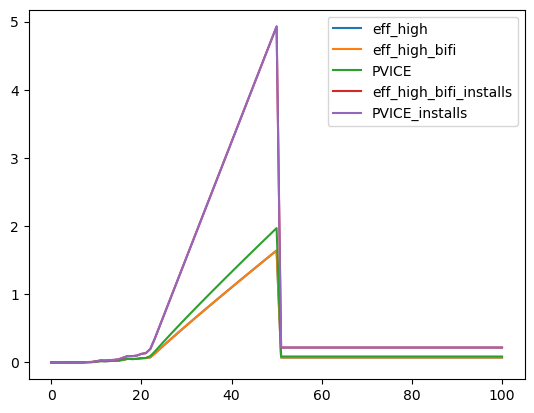

In [23]:
#plt.plot(sim1.scenario['eff_high'].dataOut_m['Yearly_Sum_Area_PathsBad'])
#plt.plot(sim1.scenario['eff_high'].dataOut_m['Cumulative_Active_Area'])
plt.plot(sim1.scenario['eff_high'].dataOut_m['Area']/1e10, label='eff_high')

#plt.plot(sim1.scenario['eff_high_bifi'].dataOut_m['Yearly_Sum_Area_PathsBad'])
#plt.plot(sim1.scenario['eff_high_bifi'].dataOut_m['Cumulative_Active_Area'])
plt.plot(sim1.scenario['eff_high_bifi'].dataOut_m['Area']/1e10, label='eff_high_bifi')

plt.plot(sim1.scenario['PV_ICE'].dataOut_m['Area']/1e10, label='PVICE')


plt.plot(sim1.scenario['eff_high_bifi'].dataIn_m['new_Installed_Capacity_[MW]']/1e6, label='eff_high_bifi_installs')
plt.plot(sim1.scenario['PV_ICE'].dataIn_m['new_Installed_Capacity_[MW]']/1e6, label='PVICE_installs')
plt.legend()

## Calculate Flows: Capacity Compensation

In [ ]:
UnderInstall_df = pd.DataFrame()


for row in range (0,len(sim1.scenario['PV_ICE'].dataIn_m)): #loop over length of years
    print(row)
    for scen in sim1.scenario.keys(): #loop over scenarios
        print(scen)
        Under_Installment = global_projection.iloc[row,0] - ((sim1.scenario[scen].dataOut_m['Effective_Capacity_[W]'][row])/1e6)  # MWATTS
        sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed
        UnderInstall_df.loc[row,scen] = Under_Installment #save the underinstallment as df
        #calculate flows for that scenario with it's bifi factor and modified weibull
        sim1.calculateMassFlow(scenarios=[scen], bifacialityfactors=bifiPathDict[scen])

sim1.calculateEnergyFlow()

0
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_16012\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
life_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  life_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_16012\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
life_low
>>>> Calculating Material Flows <<<<

Working on Scenario:  life_low
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_16012\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_16012\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_high_bifi
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_high_bifi
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_16012\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_low
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_low
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_16012\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_16012\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_high  =  2787030969.8975344  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_high  =  92130764.51066588  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_high  =  522204.79505684547  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_high  =  315960505.1026145  tonnes.
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_mid
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_mid
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_16012\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_mid  =  418253471.1418514  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_mid  =  10423569.155712938  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_mid  =  65959.96369586585  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_mid  =  47346661.458926745  tonnes.
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_low
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_low
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_16012\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
1
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_16012\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
life_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  life_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_16012\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
life_low
>>>> Calculating Material Flows <<<<

Working on Scenario:  life_low
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_16012\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_16012\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


In [ ]:
sim1.saveSimulation(customname='_EnergySensitivity_withreplacements')

#aggregate results - mass
cc_yearly, cc_cumu = sim1.aggregateResults() #have to do this to get auto plots
cc_yearly.to_csv(os.path.join(testfolder, 'cc_sensitivity_3aspect_yearly.csv'))
cc_cumu.to_csv(os.path.join(testfolder, 'cc_sensitivity_3aspect_cumu.csv'))

#aggregate results - energy
allenergy, energyGen, energy_demands = sim1.aggregateEnergyResults()
allenergy.to_csv(os.path.join(testfolder, 'cc_sensitivity_3aspect_allenergy.csv'))
energyGen.to_csv(os.path.join(testfolder, 'cc_sensitivity_3aspect_energyGen.csv'))
energy_demands.to_csv(os.path.join(testfolder, 'cc_sensitivity_3aspect_energy_demands.csv'))

UnderInstall_df.to_csv(os.path.join(testfolder, 'cc_sensitivity_3aspect_underInstalls.csv'))

In [ ]:
cc_yearly = pd.read_csv(os.path.join(testfolder, 'cc_sensitivity_3aspect_yearly.csv'), index_col='year')
cc_cumu = pd.read_csv(os.path.join(testfolder, 'cc_sensitivity_3aspect_cumu.csv'), index_col='year')

allenergy=pd.read_csv(os.path.join(testfolder, 'cc_sensitivity_3aspect_allenergy.csv'), index_col='year')
energyGen=pd.read_csv(os.path.join(testfolder, 'cc_sensitivity_3aspect_energyGen.csv'), index_col='year')
energy_demands=pd.read_csv(os.path.join(testfolder, 'cc_sensitivity_3aspect_energy_demands.csv'), index_col='year')

In [ ]:
scennames_labels = ['PV_ICE', 'life_high', 'life_low', 'eff_high', 'eff_high_bifi', 'eff_low', 'circ_high', 'circ_mid', 'circ_low']

In [ ]:
cumu_installs = cc_cumu.filter(like='newInstalled')
total_installed = cumu_installs.loc[2100]
total_installed.index= scennames_labels

plt.bar(scennames_labels, total_installed/1e6)
plt.xticks(rotation=45)
plt.ylabel('Cumulative installed [TW]')
plt.title('Cumulative Installs with Replacements')
#plt.ylim(0,410)

In [ ]:
cumu_area_deployed = pd.DataFrame()

for scen in sim1.scenario.keys():
    area_deploy = sim1.scenario[scen].dataOut_m['Area'].cumsum()
    cumu_area_deployed = pd.concat([cumu_area_deployed,area_deploy], axis=1)
    
cumu_area_deployed.columns = sim1.scenario.keys()
cumu_area_deployed_total = cumu_area_deployed.iloc[-1,:]
#cumu_area_deployed

plt.bar(scennames_labels, cumu_area_deployed.iloc[-1,:]/1e12)
plt.xticks(rotation=45)
plt.ylabel('Cumulative installed Area [m2 1e12]')
plt.title('Cumulative Area Deployed with Replacements')
#plt.ylim(0,410)

In [ ]:
cumu_virgin_module = cc_cumu.filter(like='VirginStock_Module')
virgin = cumu_virgin_module.loc[2100]
virgin.index= scennames_labels

plt.bar(scennames_labels, virgin/1e9)
#plt.legend(scennames)
plt.title('Cumulative Virgin Material Demands')
plt.ylabel('Virgin Material Requirements\n[billion tonnes]')
#plt.xticks(rotation=90)

In [ ]:
cumu_lifecycle_wastes = cc_cumu.filter(like='WasteAll_Module')
wastes = cumu_lifecycle_wastes.loc[2100]
wastes.index= scennames_labels

plt.bar(scennames_labels, wastes/1e9)
#plt.legend(scennames)
plt.title('Cumulative Lifecycle Wastes')
plt.ylabel('Lifecycle Wastes\n[billion tonnes]')

In [ ]:
e_annual_sumDemands = energy_demands.filter(like='demand_total')
e_annual_sumDemands_cumu = e_annual_sumDemands.cumsum()
cumu_e_demands = e_annual_sumDemands_cumu.loc[2100]
cumu_e_demands.index= scennames_labels

plt.bar(scennames_labels, cumu_e_demands/1e12)
plt.title('Cumulative Lifecycle Energy Demands')
plt.ylabel('Cumulative Energy Demands\n[TWh]')

In [ ]:
e_demands_eff_high = energy_demands.filter(like='eff_high')
e_demands_eff_high_cumu = e_demands_eff_high.cumsum()

e_demands_eff_high_cumu

#plt.bar(e_demands_eff_high_cumu.columns, e_demands_eff_high_cumu.iloc[-1,:])

In [ ]:
energyGen_cumu = energyGen.cumsum()
energyGen_cumu.columns = e_annual_sumDemands_cumu.columns = scennames_labels
netEnergy_cumu = energyGen_cumu.loc[[2100]] - e_annual_sumDemands_cumu.loc[[2100]]
#netEnergy_cumu.index= scennames_labels

plt.bar(scennames_labels, netEnergy_cumu.loc[2100]/1e12)
plt.title('Net Energy Cumulatively')
plt.ylabel('Cumulative Net Energy [TWh]')

In [ ]:
netEnergy_cumu_norm = netEnergy_cumu/netEnergy_cumu.loc[2100,'PV_ICE']
netEnergy_cumu_norm_waterfall = netEnergy_cumu_norm-1

plt.bar(scennames_labels, netEnergy_cumu_norm_waterfall.loc[2100])
plt.title('Net Energy Cumulatively Relative to PV ICE')
plt.ylabel('Relative Cumulative Net Energy')
#plt.ylim(-0.026,0.005)
plt.plot(0.0, lw=2)
plt.xticks(rotation=90)

In [ ]:
energyBalance_allyears = energyGen_cumu/e_annual_sumDemands_cumu
energyBalance = energyBalance_allyears.loc[2100]
energyBalance.index = scennames_labels

plt.bar(scennames_labels, energyBalance)
plt.title('Energy Balance')
plt.ylabel('Unitless')

In [ ]:
discussTable = pd.concat([total_installed,cumu_area_deployed_total,virgin,wastes,
                          cumu_e_demands, netEnergy_cumu.loc[2100].T, energyBalance],
                         axis=1, keys=['replacements','area','virgin','wastes','energydemand','netenergy','energybalance'])
#discussTable.to_csv(os.path.join(testfolder,'discussiontable.csv'))
discussTable

In [ ]:
discussTable = pd.concat([total_installed,virgin,wastes,
                          cumu_e_demands, netEnergy_cumu.loc[2100].T, energyBalance],
                         axis=1, keys=['replacements','virgin','wastes','energydemand','netenergy','energybalance'])
#discussTable.to_csv(os.path.join(testfolder,'discussiontable.csv'))
discussTable

In [ ]:
discussTable_norm = (discussTable/discussTable.loc['PV_ICE'])*100-100
discussTable_norm

In [ ]:
sense_table = discussTable_norm.T.drop(columns=['PV_ICE'])
sense_table.loc[['replacements','virgin','wastes','energydemand'],:]*=-1

colors=['#0579C1','#9DC3E6', #life_high, life_low 
        '#FF0000', '#C00000','#FF9B9B',#eff_high, eff_high_bifi, eff_low
        '#CC9B00','#FFC000','#FFE699'#circular_high, circ_mid, circ_low
            ] 

metric_labels = ['Total\nDeployment','Virgin\nMaterial\nDemands','Lifecycle\nWastes',
                 'Energy\nDemands','Net\nEnergy','Energy\nBalance']

sens_scenarios = ['Life+10 years','Life-10 years',
                  'Efficiency+5%','Efficiency+5% & 0.9','Efficiency-5%',
                  'Recycling 100%','Recycling 25%','Recycling 0%']

plt.rcParams.update({'font.size': 14})

sensitivitybars, ax = plt.subplots(figsize=(8,5))

x=np.arange(len(metric_labels)) #label locations
bwidth = 0.25 # bar width

#lifes = ax.bar(x, sense_table.iloc[:,0:1], color=colors[0:1], label=sens_scenarios[0:1],
#              width=bwidth)

#effs = ax.bar(x+bwidth, sense_table.iloc[:,2:5], color=colors[2:5], label=sens_scenarios[2:5],
#              width=bwidth)

#circs = ax.bar(x+2*bwidth, sense_table.iloc[:,5:], color=colors[5:], label=sens_scenarios[5:],
#              width=bwidth)

ax.axhline(0, lw=1, color='black')
ax.grid(axis='y', color='0.7', ls='--')
ax.set_axisbelow(True) 
ax.axhspan(0,-100, facecolor='0.2', alpha=0.1)

plt.bar(x, sense_table.iloc[:,0], color=colors[0], label=sens_scenarios[0],width=bwidth)
plt.bar(x, sense_table.iloc[:,1], color=colors[1], label=sens_scenarios[1],width=bwidth)
plt.bar(x+bwidth, sense_table.iloc[:,3], color=colors[3], label=sens_scenarios[3],width=bwidth)
plt.bar(x+bwidth, sense_table.iloc[:,2], color=colors[2], label=sens_scenarios[2],width=bwidth)
plt.bar(x+bwidth, sense_table.iloc[:,4], color=colors[4], label=sens_scenarios[4],width=bwidth)
plt.bar(x+2*bwidth, sense_table.iloc[:,5], color=colors[5], label=sens_scenarios[5],width=bwidth)
plt.bar(x+2*bwidth, sense_table.iloc[:,6], color=colors[6], label=sens_scenarios[6],width=bwidth)
plt.bar(x+2*bwidth, sense_table.iloc[:,7], color=colors[7], label=sens_scenarios[7],width=bwidth)

plt.ylim(-80,100)
ax.set_xticks(x+2*bwidth / 2)
ax.set_xticklabels(metric_labels, fontsize=12)

plt.ylabel('% Worsening        % Improvement     ')
plt.title('Sensitivity of Design Aspects')

ax.legend(bbox_to_anchor=(1,1.02), fontsize=12)

sensitivitybars.savefig('energyresults-sensitivity-3aspects.png', dpi=300, bbox_inches='tight')

In [ ]:
sense_table.loc[:,cols]

# Best Combos and Worst Combos
Now, what happens when we combine these?

In [ ]:
#load in a baseline and materials for modification
sim2 = PV_ICE.Simulation(name='sim2', path=testfolder)

sim2.createScenario(name='PV_ICE', massmodulefile=moduleFile_m, energymodulefile=moduleFile_e)
for mat in range (0, len(MATERIALS)):
    matbaseline_m = os.path.join(baselinesfolder,'baseline_material_mass_'+MATERIALS[mat]+'.csv')
    matbaseline_e = os.path.join(baselinesfolder,'baseline_material_energy_'+MATERIALS[mat]+'.csv')
    sim2.scenario['PV_ICE'].addMaterial(MATERIALS[mat], massmatfile=matbaseline_m, energymatfile=matbaseline_e)

In [ ]:
mod_circ_vars = ['mod_EOL_pg4_recycled', 'mod_EOL_pb4_recycled']

mod_alt_paths = ['mod_EOL_pg0_resell','mod_EOL_pg1_landfill','mod_EOL_pg2_stored','mod_EOL_pg3_reMFG',
                 'mod_EOL_reMFG_yield','mod_EOL_sp_reMFG_recycle',
                 'mod_EOL_pb1_landfill','mod_EOL_pb2_stored','mod_EOL_pb3_reMFG']

mat_circ_vars = ['mat_MFG_scrap_Recycled', 'mat_MFG_scrap_Recycling_eff', 'mat_MFG_scrap_Recycled_into_HQ',
                 'mat_MFG_scrap_Recycled_into_HQ_Reused4MFG',
                 
                 'mat_PG4_Recycling_target', 'mat_Recycling_yield',
                 'mat_EOL_Recycled_into_HQ', 'mat_EOL_RecycledHQ_Reused4MFG']

#mat_mfgscrap = ['mat_MFG_scrap_Recycled', 'mat_MFG_scrap_Recycling_eff', 'mat_MFG_scrap_Recycled_into_HQ',
#                 'mat_MFG_scrap_Recycled_into_HQ_Reused4MFG']

#path control variables are:
# 'mat_PG4_Recycling_target'
# 'mat_MFG_scrap_Recycled'
# 'mod_EOL_pg4_recycled'

### Good Combos

In [ ]:
#Life+Eff

sim2.createScenario(name='good_eff_life', massmodulefile=moduleFile_m, energymodulefile=moduleFile_e)
for mat in range (0, len(MATERIALS)):
    matbaseline_m = os.path.join(baselinesfolder,'baseline_material_mass_'+MATERIALS[mat]+'.csv')
    matbaseline_e = os.path.join(baselinesfolder,'baseline_material_energy_'+MATERIALS[mat]+'.csv')
    sim2.scenario['good_eff_life'].addMaterial(MATERIALS[mat], massmatfile=matbaseline_m, energymatfile=matbaseline_e)
    
#Lifetime and Degradation
#degradation rate:
sim2.modifyScenario('good_eff_life', 'mod_degradation', 
                    sim2.scenario['PV_ICE'].dataIn_m.loc[timeshift:,'mod_degradation']-0.1, start_year=2022) #standard current degrdation
#T50
sim2.modifyScenario('good_eff_life', 'mod_reliability_t50',
                    sim2.scenario['PV_ICE'].dataIn_m.loc[timeshift:,'mod_reliability_t50']+10, start_year=2022)
#t90
sim2.modifyScenario('good_eff_life', 'mod_reliability_t90',
                    sim2.scenario['PV_ICE'].dataIn_m.loc[timeshift:,'mod_reliability_t90']+10, start_year=2022) 
#Mod Project Lifetime
sim2.modifyScenario('good_eff_life', 'mod_lifetime',
                    sim2.scenario['PV_ICE'].dataIn_m.loc[timeshift:,'mod_lifetime']+10, start_year=2022) #

sim2.modifyScenario('good_eff_life', 'mod_eff', 
                    sim2.scenario['PV_ICE'].dataIn_m.loc[timeshift:,'mod_eff']+5, start_year=2022) #




In [ ]:
#Eff+Circ
sim2.createScenario(name='good_eff_circ', massmodulefile=moduleFile_m, energymodulefile=moduleFile_e)
for mat in range (0, len(MATERIALS)):
    matbaseline_m = os.path.join(baselinesfolder,'baseline_material_mass_'+MATERIALS[mat]+'.csv')
    matbaseline_e = os.path.join(baselinesfolder,'baseline_material_energy_'+MATERIALS[mat]+'.csv')
    sim2.scenario['good_eff_circ'].addMaterial(MATERIALS[mat], massmatfile=matbaseline_m, energymatfile=matbaseline_e)

for var in range(0,len(mod_alt_paths)):
    sim2.modifyScenario('good_eff_circ', mod_alt_paths[var], 0.0, start_year=2022) #set non recycle to 0   

sim2.modifyScenario('good_eff_circ', 'mod_EOL_collection_eff',100.0, start_year=2022) #collect everything
sim2.modifyScenario('good_eff_circ','mod_EOL_pb1_landfill',100.0,start_year=2022) #landfill up just in case
sim2.modifyScenario('good_eff_circ','mod_EOL_pg1_landfill',100.0,start_year=2022)
    
for var in range(0,len(mod_circ_vars)):
    sim2.modifyScenario('good_eff_circ', mod_circ_vars[var], 25.0, start_year=2022) #set recycle paths to 25%

for mat in range (0, len(MATERIALS_recycle)):
    for mvar in range(0,len(mat_circ_vars)):
        sim2.scenario['good_eff_circ'].modifyMaterials(MATERIALS_recycle[mat], mat_circ_vars[mvar],100.0, start_year=2022) #
        sim2.scenario['good_eff_circ'].modifyMaterials(MATERIALS_recycle[mat], 'mat_MFG_scrap_Recycled',25.0, start_year=2022) #

sim2.modifyScenario('good_eff_circ', 'mod_eff', 
                    sim2.scenario['PV_ICE'].dataIn_m.loc[timeshift:,'mod_eff']+5, start_year=2022) #

In [ ]:
#Life+Circ

sim2.createScenario(name='good_life_circ', massmodulefile=moduleFile_m, energymodulefile=moduleFile_e)
for mat in range (0, len(MATERIALS)):
    matbaseline_m = os.path.join(baselinesfolder,'baseline_material_mass_'+MATERIALS[mat]+'.csv')
    matbaseline_e = os.path.join(baselinesfolder,'baseline_material_energy_'+MATERIALS[mat]+'.csv')
    sim2.scenario['good_life_circ'].addMaterial(MATERIALS[mat], massmatfile=matbaseline_m, energymatfile=matbaseline_e)
    
#Lifetime and Degradation
#degradation rate:
sim2.modifyScenario('good_life_circ', 'mod_degradation', 
                    sim2.scenario['PV_ICE'].dataIn_m.loc[timeshift:,'mod_degradation']-0.1, start_year=2022) #standard current degrdation
#T50
sim2.modifyScenario('good_life_circ', 'mod_reliability_t50',
                    sim2.scenario['PV_ICE'].dataIn_m.loc[timeshift:,'mod_reliability_t50']+10, start_year=2022)
#t90
sim2.modifyScenario('good_life_circ', 'mod_reliability_t90',
                    sim2.scenario['PV_ICE'].dataIn_m.loc[timeshift:,'mod_reliability_t90']+10, start_year=2022) 
#Mod Project Lifetime
sim2.modifyScenario('good_life_circ', 'mod_lifetime',
                    sim2.scenario['PV_ICE'].dataIn_m.loc[timeshift:,'mod_lifetime']+10, start_year=2022) #

for var in range(0,len(mod_alt_paths)):
    sim2.modifyScenario('good_life_circ', mod_alt_paths[var], 0.0, start_year=2022) #set non recycle to 0   

sim2.modifyScenario('good_life_circ', 'mod_EOL_collection_eff',100.0, start_year=2022) #collect everything
sim2.modifyScenario('good_life_circ','mod_EOL_pb1_landfill',100.0,start_year=2022) #landfill up just in case
sim2.modifyScenario('good_life_circ','mod_EOL_pg1_landfill',100.0,start_year=2022)
    
for var in range(0,len(mod_circ_vars)):
    sim2.modifyScenario('good_life_circ', mod_circ_vars[var], 25.0, start_year=2022) #set recycle paths to 25%

for mat in range (0, len(MATERIALS_recycle)):
    for mvar in range(0,len(mat_circ_vars)):
        sim2.scenario['good_life_circ'].modifyMaterials(MATERIALS_recycle[mat], mat_circ_vars[mvar],100.0, start_year=2022) #
        sim2.scenario['good_life_circ'].modifyMaterials(MATERIALS_recycle[mat], 'mat_MFG_scrap_Recycled',25.0, start_year=2022) #

### Bad Combos

In [ ]:
#life eff
sim2.createScenario(name='bad_life_eff', massmodulefile=moduleFile_m, energymodulefile=moduleFile_e)
for mat in range (0, len(MATERIALS)):
    matbaseline_m = os.path.join(baselinesfolder,'baseline_material_mass_'+MATERIALS[mat]+'.csv')
    matbaseline_e = os.path.join(baselinesfolder,'baseline_material_energy_'+MATERIALS[mat]+'.csv')
    sim2.scenario['bad_life_eff'].addMaterial(MATERIALS[mat], massmatfile=matbaseline_m, energymatfile=matbaseline_e)
    
#Lifetime and Degradation
#degradation rate:
sim2.modifyScenario('bad_life_eff', 'mod_degradation', 
                    sim2.scenario['PV_ICE'].dataIn_m.loc[timeshift:,'mod_degradation']+0.1, start_year=2022) #standard current degrdation
#T50
sim2.modifyScenario('bad_life_eff', 'mod_reliability_t50',
                    sim2.scenario['PV_ICE'].dataIn_m.loc[timeshift:,'mod_reliability_t50']-10, start_year=2022)
#t90
sim2.modifyScenario('bad_life_eff', 'mod_reliability_t90',
                    sim2.scenario['PV_ICE'].dataIn_m.loc[timeshift:,'mod_reliability_t90']-10, start_year=2022) 
#Mod Project Lifetime
sim2.modifyScenario('bad_life_eff', 'mod_lifetime',
                    sim2.scenario['PV_ICE'].dataIn_m.loc[timeshift:,'mod_lifetime']-10, start_year=2022) #project lifetime of 25 years
#eff -5
sim2.modifyScenario('bad_life_eff', 'mod_eff', 
                    sim2.scenario['PV_ICE'].dataIn_m.loc[timeshift:,'mod_eff']-5, start_year=2022) #

In [ ]:
#eff circ
sim2.createScenario(name='bad_eff_circ', massmodulefile=moduleFile_m, energymodulefile=moduleFile_e)
for mat in range (0, len(MATERIALS)):
    matbaseline_m = os.path.join(baselinesfolder,'baseline_material_mass_'+MATERIALS[mat]+'.csv')
    matbaseline_e = os.path.join(baselinesfolder,'baseline_material_energy_'+MATERIALS[mat]+'.csv')
    sim2.scenario['bad_eff_circ'].addMaterial(MATERIALS[mat], massmatfile=matbaseline_m, energymatfile=matbaseline_e)

sim2.modifyScenario('bad_eff_circ', 'mod_eff', 
                    sim2.scenario['PV_ICE'].dataIn_m.loc[timeshift:,'mod_eff']-5, start_year=2022) #

for var in range(0,len(mod_circ_vars)):
    sim2.modifyScenario('bad_eff_circ', mod_circ_vars[var],0.0, start_year=2022) #set recycle to 0
    
for var in range(0,len(mod_alt_paths)):
    sim2.modifyScenario('bad_eff_circ', mod_alt_paths[var], 0.0, start_year=2022) #set non recycle to 0   

sim2.modifyScenario('bad_eff_circ', 'mod_EOL_collection_eff',0.0, start_year=2022) #collect nothing
sim2.modifyScenario('bad_eff_circ','mod_EOL_pb1_landfill',100.0,start_year=2022) #landfill up just in case
sim2.modifyScenario('bad_eff_circ','mod_EOL_pg1_landfill',100.0,start_year=2022)

for mat in range (0, len(MATERIALS_recycle)):
    for mvar in range(0,len(mat_circ_vars)):
        sim2.scenario['bad_eff_circ'].modifyMaterials(MATERIALS_recycle[mat], mat_circ_vars[mvar],0.0, start_year=2022) #

In [ ]:
#life circ
sim2.createScenario(name='bad_life_circ', massmodulefile=moduleFile_m, energymodulefile=moduleFile_e)
for mat in range (0, len(MATERIALS)):
    matbaseline_m = os.path.join(baselinesfolder,'baseline_material_mass_'+MATERIALS[mat]+'.csv')
    matbaseline_e = os.path.join(baselinesfolder,'baseline_material_energy_'+MATERIALS[mat]+'.csv')
    sim2.scenario['bad_life_circ'].addMaterial(MATERIALS[mat], massmatfile=matbaseline_m, energymatfile=matbaseline_e)

#degradation rate:
sim2.modifyScenario('bad_life_circ', 'mod_degradation', 
                    sim2.scenario['PV_ICE'].dataIn_m.loc[timeshift:,'mod_degradation']+0.1, start_year=2022) #standard current degrdation
#T50
sim2.modifyScenario('bad_life_circ', 'mod_reliability_t50',
                    sim2.scenario['PV_ICE'].dataIn_m.loc[timeshift:,'mod_reliability_t50']-10, start_year=2022)
#t90
sim2.modifyScenario('bad_life_circ', 'mod_reliability_t90',
                    sim2.scenario['PV_ICE'].dataIn_m.loc[timeshift:,'mod_reliability_t90']-10, start_year=2022) 
#Mod Project Lifetime
sim2.modifyScenario('bad_life_circ', 'mod_lifetime',
                    sim2.scenario['PV_ICE'].dataIn_m.loc[timeshift:,'mod_lifetime']-10, start_year=2022)
    
#0 circ
for var in range(0,len(mod_circ_vars)):
    sim2.modifyScenario('bad_life_circ', mod_circ_vars[var],0.0, start_year=2022) #set recycle to 0
    
for var in range(0,len(mod_alt_paths)):
    sim2.modifyScenario('bad_life_circ', mod_alt_paths[var], 0.0, start_year=2022) #set non recycle to 0   

sim2.modifyScenario('bad_life_circ', 'mod_EOL_collection_eff',0.0, start_year=2022) #collect nothing
sim2.modifyScenario('bad_life_circ','mod_EOL_pb1_landfill',100.0,start_year=2022) #landfill up just in case
sim2.modifyScenario('bad_life_circ','mod_EOL_pg1_landfill',100.0,start_year=2022)

for mat in range (0, len(MATERIALS_recycle)):
    for mvar in range(0,len(mat_circ_vars)):
        sim2.scenario['bad_life_circ'].modifyMaterials(MATERIALS_recycle[mat], mat_circ_vars[mvar],0.0, start_year=2022) #

In [ ]:
#trim to start in 2000, this trims module and materials
#had to specify and end year, cannot use to extend
sim2.trim_Years(startYear=2000, endYear=2100)

In [ ]:
global_projection = pd.read_csv(os.path.join(supportMatfolder,'output-globalInstallsProjection.csv'), index_col=0)
global_projection.iloc[-1,:]

#fig, ax1 = plt.subplots()

#ax1.stackplot(global_projection.index, global_projection['World_cum']/1e6, color='#F7A11A')
#ax1.set_ylabel('Cumulative Solar Capacity [TW]', color='#F7A11A')
#ax1.set_ylim(0,90)
#ax1.set_xlim(2000,2100)
#ax2 = ax1.twinx()
#ax2.plot(global_projection['World_annual_[MWdc]']/1e6)
#ax2.set_ylabel('Annual Installations [TW]')
#ax2.set_ylim(0,5)
#plt.show()

#fig.savefig('energyresults-deployment.png', dpi=300, bbox_inches='tight')

In [ ]:
#deployment projection for all scenarios
sim2.modifyScenario(scenarios=None,stage='new_Installed_Capacity_[MW]', 
                    value= global_projection['World_annual_[MWdc]'], start_year=2000)

In [ ]:
sim2.scenario.keys()

In [ ]:
bifiFactors = {'PV_ICE':0.0,
               'good_eff_life':0.9, 
               'good_eff_circ': 0.9,
               'good_life_circ': 0.0,
               'bad_life_eff': 0.0,
               'bad_eff_circ':0.0,
               'bad_life_circ': 0.0
              } 

#PV ICE currently set up to read in a csv of bifi factors, so generate files to read in 
idx_temp = pd.RangeIndex(start=2000,stop=2101,step=1) #create the index
df_temp = pd.DataFrame(index=idx_temp, columns=['bifi'], dtype=float)
bifiPathDict={}

for f in bifiFactors.keys(): #loop over module types
    bifi = df_temp.copy() #copy of df
    bifi['bifi'] = bifiFactors[f] #assign column
    bifipath = os.path.join(testfolder,'bifi_'+str(f)+'.csv') #create file path
    bifi.to_csv(path_or_buf=bifipath, index_label='year') #create file
    bifiPathDict[str(f)] = bifipath
    #append bifi path to dict? or list?

## Calculate Mass Flow: Identical Installs

In [ ]:
#CALCULATE MASS FLOW= 

for scen in sim2.scenario.keys(): #loop over scenarios
    sim2.calculateMassFlow(scenarios=[scen], bifacialityfactors=bifiPathDict[scen])

In [ ]:
#sim1.calculateMassFlow()

In [ ]:
ii_yearly2, ii_cumu2 = sim2.aggregateResults() #have to do this to get auto plots
sim2.saveSimulation(customname='_EnergySensitivity-goodbad_identicalinstalls')

In [ ]:
effective_capacity = ii_yearly2.filter(like='ActiveCapacity')

plt.plot(ii_cumu2['newInstalledCapacity_sim2_PV_ICE_[MW]']/1e6, label='Capacity Target', color='black', ls='--')

plt.plot(effective_capacity/1e6, label=sim2.scenario.keys())

plt.legend()
plt.ylabel('Effective Capacity [TW]')
plt.title('Effective Capacity: No Replacements')
plt.ylim(0,)

In [ ]:
## Calculate Flows: Capacity Compensation

In [ ]:
UnderInstall_df = pd.DataFrame()


for row in range (0,len(sim2.scenario['PV_ICE'].dataIn_m)): #loop over length of years
    print(row)
    for scen in sim2.scenario.keys(): #loop over scenarios
        print(scen)
        Under_Installment = global_projection.iloc[row,0] - ((sim2.scenario[scen].dataOut_m['Effective_Capacity_[W]'][row])/1e6)  # MWATTS
        sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed
        UnderInstall_df.loc[row,scen] = Under_Installment #save the underinstallment as df
        #calculate flows for that scenario with it's bifi factor and modified weibull
        sim2.calculateMassFlow(scenarios=[scen], bifacialityfactors=bifiPathDict[scen])

sim2.calculateEnergyFlow()

In [ ]:
sim2.saveSimulation(customname='_EnergySensitivity_withreplacements')

#aggregate results - mass
cc_yearly2, cc_cumu2 = sim2.aggregateResults() #have to do this to get auto plots
cc_yearly2.to_csv(os.path.join(testfolder, 'cc_sensitivity_combos_yearly.csv'))
cc_cumu2.to_csv(os.path.join(testfolder, 'cc_sensitivity_combos_cumu.csv'))

#aggregate results - energy
allenergy2, energyGen2, energy_demands2 = sim2.aggregateEnergyResults()
allenergy2.to_csv(os.path.join(testfolder, 'cc_sensitivity_combos_allenergy.csv'))
energyGen2.to_csv(os.path.join(testfolder, 'cc_sensitivity_combos_energyGen.csv'))
energy_demands2.to_csv(os.path.join(testfolder, 'cc_sensitivity_combos_energy_demands.csv'))

UnderInstall_df.to_csv(os.path.join(testfolder, 'cc_sensitivity_combos_underInstalls.csv'))

In [ ]:
scennames_labels2=sim2.scenario.keys()

In [ ]:
cumu_installs2 = cc_cumu2.filter(like='newInstalled')
total_installed2 = cumu_installs2.loc[2100]
total_installed2.index= scennames_labels2

plt.bar(scennames_labels2, total_installed2/1e6)
plt.xticks(rotation=45)
plt.ylabel('Cumulative installed [TW]')
plt.title('Cumulative Installs with Replacements')
#plt.ylim(0,410)

In [ ]:
cumu_area_deployed2 = pd.DataFrame()

for scen in sim2.scenario.keys():
    area_deploy = sim2.scenario[scen].dataOut_m['Area'].cumsum()
    cumu_area_deployed2 = pd.concat([cumu_area_deployed2,area_deploy], axis=1)
    
cumu_area_deployed2.columns = sim2.scenario.keys()
cumu_area_deployed2_total = cumu_area_deployed2.iloc[-1,:]
#cumu_area_deployed

plt.bar(scennames_labels2, cumu_area_deployed2.iloc[-1,:]/1e12)
plt.xticks(rotation=45)
plt.ylabel('Cumulative installed Area [m2 1e12]')
plt.title('Cumulative Area Deployed with Replacements')
#plt.ylim(0,410)

In [ ]:
cumu_virgin_module2 = cc_cumu2.filter(like='VirginStock_Module')
virgin2 = cumu_virgin_module2.loc[2100]
virgin2.index= scennames_labels2

plt.bar(scennames_labels2, virgin2/1e9)
#plt.legend(scennames)
plt.title('Cumulative Virgin Material Demands')
plt.ylabel('Virgin Material Requirements\n[billion tonnes]')
plt.xticks(rotation=45)

In [ ]:
cumu_lifecycle_wastes2 = cc_cumu2.filter(like='WasteAll_Module')
wastes2 = cumu_lifecycle_wastes2.loc[2100]
wastes2.index= scennames_labels2

plt.bar(scennames_labels2, wastes2/1e9)
#plt.legend(scennames)
plt.title('Cumulative Lifecycle Wastes')
plt.ylabel('Lifecycle Wastes\n[billion tonnes]')
plt.xticks(rotation=45)

In [ ]:
e_annual_sumDemands2 = energy_demands2.filter(like='demand_total')
e_annual_sumDemands_cumu2 = e_annual_sumDemands2.cumsum()
cumu_e_demands2 = e_annual_sumDemands_cumu2.loc[2100]
cumu_e_demands2.index= scennames_labels2

plt.bar(scennames_labels2, cumu_e_demands2/1e12)
plt.title('Cumulative Lifecycle Energy Demands')
plt.ylabel('Cumulative Energy Demands\n[TWh]')

In [ ]:
energyGen_cumu2 = energyGen2.cumsum()
energyGen_cumu2.columns = e_annual_sumDemands_cumu2.columns = scennames_labels2
netEnergy_cumu2 = energyGen_cumu2.loc[[2100]] - e_annual_sumDemands_cumu2.loc[[2100]]
#netEnergy_cumu.index= scennames_labels

plt.bar(scennames_labels2, netEnergy_cumu2.loc[2100]/1e12)
plt.title('Net Energy Cumulatively')
plt.ylabel('Cumulative Net Energy [TWh]')

In [ ]:
netEnergy_cumu_norm2 = netEnergy_cumu2/netEnergy_cumu2.loc[2100,'PV_ICE']
netEnergy_cumu_norm_waterfall2 = netEnergy_cumu_norm2-1

plt.bar(scennames_labels2, netEnergy_cumu_norm_waterfall2.loc[2100])
plt.title('Net Energy Cumulatively Relative to PV ICE')
plt.ylabel('Relative Cumulative Net Energy')
#plt.ylim(-0.026,0.005)
plt.plot(0.0, lw=2)
plt.xticks(rotation=90)

In [ ]:
energyBalance_allyears2 = energyGen_cumu2/e_annual_sumDemands_cumu2
energyBalance2 = energyBalance_allyears2.loc[2100]
energyBalance2.index = scennames_labels2

plt.bar(scennames_labels2, energyBalance2)
plt.title('Energy Balance')
plt.ylabel('Unitless')

In [ ]:
discussTable2 = pd.concat([total_installed2,cumu_area_deployed2_total,virgin2,wastes2,
                           cumu_e_demands2, netEnergy_cumu2.loc[2100].T, energyBalance2],
                         axis=1, keys=['replacements','area','virgin','wastes','energydemand','netenergy','energybalance'])
#discussTable.to_csv(os.path.join(testfolder,'discussiontable.csv'))
discussTable2

In [ ]:
discussTable_all = pd.concat([discussTable,discussTable2], axis=0)
discussTable_all

In [ ]:
discussTable_norm = (discussTable_all/discussTable.loc['PV_ICE'])*100-100
discussTable_norm

In [ ]:
graph_order = ['life_high','life_low','good_eff_life','bad_life_eff','eff_high','eff_high_bifi','eff_low','good_eff_circ',
               'bad_eff_circ','circ_high','circ_low','good_life_circ','bad_life_circ']


# Sensitivity of Energy to Circularity
Above it appears that both increasing and decreasing circularity reduce energy demands, which would imply there might be a bell curve or threshold situation. OR more likely, open vs closed loop matters a lot.

In [ ]:
MATERIALS = ['glass', 'silicon', 'silver', 'aluminium_frames', 'copper', 'encapsulant', 'backsheet']
MATERIALS_recycle = ['glass','silicon','silver','aluminium_frames']
MATERIALS_NOrecycle = ['copper','encapsulant','backsheet']

In [ ]:
#load in a baseline and materials for modification
sim3 = PV_ICE.Simulation(name='sim3', path=testfolder)

sim3.createScenario(name='PV_ICE', massmodulefile=moduleFile_m, energymodulefile=moduleFile_e)
for mat in range (0, len(MATERIALS)):
    matbaseline_m = os.path.join(baselinesfolder,'baseline_material_mass_'+MATERIALS[mat]+'.csv')
    matbaseline_e = os.path.join(baselinesfolder,'baseline_material_energy_'+MATERIALS[mat]+'.csv')
    sim3.scenario['PV_ICE'].addMaterial(MATERIALS[mat], massmatfile=matbaseline_m, energymatfile=matbaseline_e)

In [ ]:
mod_circ_vars = ['mod_EOL_pg4_recycled', 'mod_EOL_pb4_recycled']

mod_alt_paths = ['mod_EOL_pg0_resell','mod_EOL_pg2_stored','mod_EOL_pg3_reMFG',
                 'mod_EOL_reMFG_yield','mod_EOL_sp_reMFG_recycle',
                 'mod_EOL_pb2_stored','mod_EOL_pb3_reMFG'] #removed landfills

mat_circ_vars = ['mat_MFG_scrap_Recycled', 'mat_MFG_scrap_Recycling_eff', 'mat_MFG_scrap_Recycled_into_HQ',
                 'mat_MFG_scrap_Recycled_into_HQ_Reused4MFG', 
                 'mat_PG4_Recycling_target', 'mat_Recycling_yield',
                 'mat_EOL_Recycled_into_HQ', 'mat_EOL_RecycledHQ_Reused4MFG']

#mat_mfgscrap = ['mat_MFG_scrap_Recycled', 'mat_MFG_scrap_Recycling_eff', 'mat_MFG_scrap_Recycled_into_HQ',
#                 'mat_MFG_scrap_Recycled_into_HQ_Reused4MFG']

In [ ]:
#range of circularity / closed loop vs downcycling
rrates = pd.Series(range(0,101,10))
for r in range(0,len(rrates)): print(rrates[r])

In [ ]:
#closed loop at various rates
for r in range(0,len(rrates)):
    scenname = 'circ_CL_'+str(rrates[r])
    sim3.createScenario(name=scenname, massmodulefile=moduleFile_m, energymodulefile=moduleFile_e)
    for mat in range (0, len(MATERIALS)):
        matbaseline_m = os.path.join(baselinesfolder,'baseline_material_mass_'+MATERIALS[mat]+'.csv')
        matbaseline_e = os.path.join(baselinesfolder,'baseline_material_energy_'+MATERIALS[mat]+'.csv')
        sim3.scenario[scenname].addMaterial(MATERIALS[mat], massmatfile=matbaseline_m, energymatfile=matbaseline_e)
    
    for var in range(0,len(mod_alt_paths)):
        sim3.modifyScenario(scenname, mod_alt_paths[var], 0.0, start_year=2022) #set non recycle to 0 (landfill should auto adjust)
    
    sim3.modifyScenario(scenname, 'mod_EOL_collection_eff',100.0, start_year=2022) #collect everything
    sim3.modifyScenario(scenname,'mod_EOL_pb1_landfill',100.0,start_year=2022) #landfill up just in case
    sim3.modifyScenario(scenname,'mod_EOL_pg1_landfill',100.0,start_year=2022)
    
    for var in range(0,len(mod_circ_vars)):
        sim3.modifyScenario(scenname, mod_circ_vars[var], rrates[r], start_year=2022) #recycle modules at the rate at EoL

    for mat in range (0, len(MATERIALS_recycle)): #modify only the recycled materials
        for mvar in range(0,len(mat_circ_vars)):
            sim3.scenario[scenname].modifyMaterials(MATERIALS_recycle[mat], mat_circ_vars[mvar], 100.0, start_year=2022) #100% recycle HQ path and yield
            sim3.scenario[scenname].modifyMaterials(MATERIALS_recycle[mat], 'mat_MFG_scrap_Recycled', rrates[r], start_year=2022) # MFG scrap at rate


In [ ]:
#open loop at various rates
for r in range(0,len(rrates)):
    scenname = 'circ_OL_'+str(rrates[r])
    sim3.createScenario(name=scenname, massmodulefile=moduleFile_m, energymodulefile=moduleFile_e)
    for mat in range (0, len(MATERIALS)):
        matbaseline_m = os.path.join(baselinesfolder,'baseline_material_mass_'+MATERIALS[mat]+'.csv')
        matbaseline_e = os.path.join(baselinesfolder,'baseline_material_energy_'+MATERIALS[mat]+'.csv')
        sim3.scenario[scenname].addMaterial(MATERIALS[mat], massmatfile=matbaseline_m, energymatfile=matbaseline_e)
    
    for var in range(0,len(mod_alt_paths)):
        sim3.modifyScenario(scenname, mod_alt_paths[var], 0.0, start_year=2022) #set non recycle to 0
        
    sim3.modifyScenario(scenname, 'mod_EOL_collection_eff',100.0, start_year=2022) #collect everything
    sim3.modifyScenario(scenname,'mod_EOL_pb1_landfill',100.0,start_year=2022) #landfill up just in case
    sim3.modifyScenario(scenname,'mod_EOL_pg1_landfill',100.0,start_year=2022)
    
    for var in range(0,len(mod_circ_vars)):
        sim3.modifyScenario(scenname, mod_circ_vars[var], rrates[r], start_year=2022) #recycle modules at the rate

    for mat in range (0, len(MATERIALS_recycle)): #modify only the recycled materials
        for mvar in range(0,len(mat_circ_vars)):
            sim3.scenario[scenname].modifyMaterials(MATERIALS_recycle[mat], mat_circ_vars[mvar], 100.0, start_year=2022) # 100% recycle HQ path and yield
            sim3.scenario[scenname].modifyMaterials(MATERIALS_recycle[mat], 'mat_MFG_scrap_Recycled', rrates[r], start_year=2022) #MFG scrap at rate
            sim3.scenario[scenname].modifyMaterials(MATERIALS_recycle[mat], 'mat_MFG_scrap_Recycled_into_HQ', 0.0, start_year=2022) #Open loop
            sim3.scenario[scenname].modifyMaterials(MATERIALS_recycle[mat], 'mat_EOL_RecycledHQ_Reused4MFG', 0.0, start_year=2022) #Open loop

In [ ]:
#trim to start in 2000, this trims module and materials
#had to specify and end year, cannot use to extend
sim3.trim_Years(startYear=2000, endYear=2100)

In [ ]:
global_projection = pd.read_csv(os.path.join(supportMatfolder,'output-globalInstallsProjection.csv'), index_col=0)
global_projection.iloc[-1,:]

#fig, ax1 = plt.subplots()

#ax1.stackplot(global_projection.index, global_projection['World_cum']/1e6, color='#F7A11A')
#ax1.set_ylabel('Cumulative Solar Capacity [TW]', color='#F7A11A')
#ax1.set_ylim(0,90)
#ax1.set_xlim(2000,2100)
#ax2 = ax1.twinx()
#ax2.plot(global_projection['World_annual_[MWdc]']/1e6)
#ax2.set_ylabel('Annual Installations [TW]')
#ax2.set_ylim(0,5)
#plt.show()

#fig.savefig('energyresults-deployment.png', dpi=300, bbox_inches='tight')

In [ ]:
#deployment projection for all scenarios
sim3.modifyScenario(scenarios=None,stage='new_Installed_Capacity_[MW]', 
                    value= global_projection['World_annual_[MWdc]'], start_year=2000)

In [ ]:
sim3.scenario['circ_CL_0'].material['silicon'].matdataIn_e

In [ ]:
sim3.calculateMassFlow()

In [ ]:
UnderInstall_df = pd.DataFrame()


for row in range (0,len(sim3.scenario['PV_ICE'].dataIn_m)): #loop over length of years
    print(row)
    for scen in sim3.scenario.keys(): #loop over scenarios
        print(scen)
        Under_Installment = global_projection.iloc[row,0] - ((sim3.scenario[scen].dataOut_m['Effective_Capacity_[W]'][row])/1e6)  # MWATTS
        sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed
        UnderInstall_df.loc[row,scen] = Under_Installment #save the underinstallment as df
        #calculate flows for that scenario with it's bifi factor and modified weibull
        sim3.calculateMassFlow(scenarios=[scen])

sim3.calculateEnergyFlow()

In [ ]:
sim3.saveSimulation(customname='_EnergySensitivity_withreplacements')

#aggregate results - mass
cc_yearly3, cc_cumu3 = sim3.aggregateResults() #have to do this to get auto plots
cc_yearly3.to_csv(os.path.join(testfolder, 'cc_sensitivity_CLOL_yearly3.csv'))
cc_cumu3.to_csv(os.path.join(testfolder, 'cc_sensitivity_CLOL_cumu3.csv'))

#aggregate results - energy
allenergy3, energyGen3, energy_demands3 = sim3.aggregateEnergyResults()
allenergy3.to_csv(os.path.join(testfolder, 'cc_sensitivity_CLOL_allenergy3.csv'))
energyGen3.to_csv(os.path.join(testfolder, 'cc_sensitivity_CLOL_energyGen3.csv'))
energy_demands3.to_csv(os.path.join(testfolder, 'cc_sensitivity_CLOL_energy_demands3.csv'))

#UnderInstall_df.to_csv(os.path.join(testfolder, 'cc_10scen_underInstalls.csv'))

In [ ]:
#read in files for speed
allenergy3 = pd.read_csv(os.path.join(testfolder, 'cc_sensitivity_CLOL_allenergy3.csv'), index_col=0)
energyGen3 = pd.read_csv(os.path.join(testfolder, 'cc_sensitivity_CLOL_energyGen3.csv'), index_col=0)
energy_demands3 = pd.read_csv(os.path.join(testfolder, 'cc_sensitivity_CLOL_energy_demands3.csv'), index_col=0)

In [ ]:
scennames_labels3=sim3.scenario.keys()

In [ ]:
cumu_installs3 = cc_cumu3.filter(like='newInstalled')
total_installed3 = cumu_installs3.loc[2100]
total_installed3.index= scennames_labels3

plt.bar(scennames_labels3, total_installed3/1e6)
#plt.xticks(rotation=90)
plt.ylabel('Cumulative installed [TW]')
plt.title('Cumulative Installs with Replacements')
#plt.ylim(0,410)

In [ ]:
cumu_area_deployed3 = pd.DataFrame()

for scen in sim3.scenario.keys():
    area_deploy = sim3.scenario[scen].dataOut_m['Area'].cumsum()
    cumu_area_deployed3 = pd.concat([cumu_area_deployed3,area_deploy], axis=1)
    
cumu_area_deployed3.columns = sim3.scenario.keys()
cumu_area_deployed3_total = cumu_area_deployed3.iloc[-1,:]
#cumu_area_deployed

plt.bar(scennames_labels3, cumu_area_deployed3.iloc[-1,:]/1e12)
plt.xticks(rotation=45)
plt.ylabel('Cumulative installed Area [m2 1e12]')
plt.title('Cumulative Area Deployed with Replacements')
#plt.ylim(0,410)

In [ ]:
cumu_virgin_module3 = cc_cumu3.filter(like='VirginStock_Module')
virgin3 = cumu_virgin_module3.loc[2100]
virgin3.index= scennames_labels3

plt.bar(scennames_labels3, virgin3/1e9)
#plt.legend(scennames)
plt.title('Cumulative Virgin Material Demands')
plt.ylabel('Virgin Material Requirements\n[billion tonnes]')
#plt.xticks(rotation=90)

In [ ]:
cumu_lifecycle_wastes3 = cc_cumu3.filter(like='WasteAll_Module')
wastes3 = cumu_lifecycle_wastes3.loc[2100]
wastes3.index= scennames_labels3

plt.bar(scennames_labels3, wastes3/1e9)
#plt.legend(scennames)
plt.title('Cumulative Lifecycle Wastes')
plt.ylabel('Lifecycle Wastes\n[billion tonnes]')

In [ ]:
cumu_e_demands3

In [ ]:
e_annual_sumDemands3 = energy_demands3.filter(like='demand_total')
e_annual_sumDemands_cumu3 = e_annual_sumDemands3.cumsum()
cumu_e_demands3 = e_annual_sumDemands_cumu3.loc[2100]
cumu_e_demands3.index= scennames_labels3

plt.bar(scennames_labels3, cumu_e_demands3/1e12)
plt.title('Cumulative Lifecycle Energy Demands')
plt.ylabel('Cumulative Energy Demands\n[TWh]')
plt.xticks(rotation=90)

In [ ]:
cumu_e_demands3_norm = cumu_e_demands3/cumu_e_demands3.loc['PV_ICE']-1
plt.bar(scennames_labels3, cumu_e_demands3_norm)
plt.title('Energy Demands - Normalized')
plt.ylabel('Fraction Change from Baseline')
plt.xticks(rotation=90)

In [ ]:
energyGen3

In [ ]:
energyGen_cumu3 = energyGen3.cumsum()
energyGen_cumu3.columns = e_annual_sumDemands_cumu3.columns = scennames_labels3
netEnergy_cumu3 = energyGen_cumu3.loc[[2100]] - e_annual_sumDemands_cumu3.loc[[2100]]
#netEnergy_cumu.index= scennames_labels

plt.bar(scennames_labels3, netEnergy_cumu3.loc[2100]/1e12)
plt.title('Net Energy Cumulatively')
plt.ylabel('Cumulative Net Energy [TWh]')

In [ ]:
netEnergy_cumu_norm3 = netEnergy_cumu3/netEnergy_cumu3.loc[2100,'PV_ICE']
netEnergy_cumu_norm_waterfall3 = netEnergy_cumu_norm3-1

plt.bar(scennames_labels3, netEnergy_cumu_norm_waterfall3.loc[2100])
plt.title('Net Energy Cumulatively Relative to PV ICE')
plt.ylabel('Relative Cumulative Net Energy')
#plt.ylim(-0.026,0.005)
plt.plot(0.0, lw=2)
plt.xticks(rotation=90)

In [ ]:
energyBalance_allyears3 = energyGen_cumu3/e_annual_sumDemands_cumu3
energyBalance3 = energyBalance_allyears3.loc[2100]
energyBalance3.index = scennames_labels3

plt.bar(scennames_labels3, energyBalance3)
plt.title('Energy Balance')
plt.ylabel('Unitless')

In [ ]:
energyBalance3_norm = energyBalance3/energyBalance3.loc['PV_ICE']-1
plt.bar(scennames_labels3, energyBalance3_norm)
plt.title('Energy Balance - Normalized')
plt.ylabel('Unitless')
plt.xticks(rotation=90)

In [ ]:
discussTable3 = pd.concat([total_installed3,cumu_area_deployed3_total,virgin3,wastes3,
                           cumu_e_demands3, netEnergy_cumu3.loc[2100].T, energyBalance3],
                         axis=1, keys=['replacements','area','virgin','wastes','energydemand','netenergy','energybalance'])
#discussTable.to_csv(os.path.join(testfolder,'discussiontable.csv'))
discussTable3

In [ ]:
discussTable3_norm = (discussTable3/discussTable3.loc['PV_ICE'])*100-100
discussTable3_norm